# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


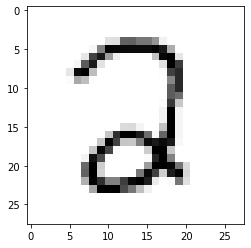

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24939142288596
train accuracy is: 0.6220163578701385, test accuracy is 0.6265120967741935


Epoch 10 Loss 0.24676921700216647
train accuracy is: 0.728175596728426, test accuracy is 0.7459677419354839


Epoch 20 Loss 0.23200873251984952
train accuracy is: 0.8413453513603739, test accuracy is 0.8563508064516129


Epoch 30 Loss 0.1545134658299121
train accuracy is: 0.8922550492405275, test accuracy is 0.9017137096774194


Epoch 40 Loss 0.07945602721320771
train accuracy is: 0.9175429811383742, test accuracy is 0.9269153225806451


Epoch 50 Loss 0.05660225653614505
train accuracy is: 0.9356534802203305, test accuracy is 0.9480846774193549


Epoch 60 Loss 0.04611816966467066
train accuracy is: 0.9473376731764314, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.040230574669891155
train accuracy is: 0.9540143548656318, test accuracy is 0.9637096774193549


Epoch 80 Loss 0.03647220040335162
train accuracy is: 0.9578534468369221, test accuracy is 0.9662298387096774


Epoch 90 Loss 0.033844551268863855
train accuracy is: 0.9611083291604072, test accuracy is 0.967741935483871


Epoch 100 Loss 0.03187987923377571
train accuracy is: 0.9630278751460524, test accuracy is 0.9692540322580645


Epoch 110 Loss 0.030338374465879305
train accuracy is: 0.9644466700050075, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.02908346984193063
train accuracy is: 0.9654481722583875, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.02802516740029462
train accuracy is: 0.9668669671173427, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.027108265926464495
train accuracy is: 0.9677850108496078, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.026298984044897646
train accuracy is: 0.9690368886663329, test accuracy is 0.9712701612903226


Epoch 160 Loss 0.025577323025894792
train accuracy is: 0.9694541812719079, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.024926097144799833
train accuracy is: 0.9705391420464029, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.024327043470725757
train accuracy is: 0.970956434651978, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.023766798730744613
train accuracy is: 0.971791019863128, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.02325177191273572
train accuracy is: 0.9729594391587381, test accuracy is 0.9737903225806451


Epoch 210 Loss 0.022762570065495983
train accuracy is: 0.9737940243698882, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.02230948302456353
train accuracy is: 0.9743782340176932, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.02187003610081708
train accuracy is: 0.9748789851443832, test accuracy is 0.9737903225806451


Epoch 240 Loss 0.0214632359088708
train accuracy is: 0.9754631947921882, test accuracy is 0.9737903225806451


0.037770006633657024

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.24070705019872798
train accuracy is: 0.6808546152562177, test accuracy is 0.6683467741935484


Epoch 10 Loss 0.10102477643403425
train accuracy is: 0.914037723251544, test accuracy is 0.9168346774193549


Epoch 20 Loss 0.07809580377956243
train accuracy is: 0.9298948422633951, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06749847682032614
train accuracy is: 0.9358203972625605, test accuracy is 0.9475806451612904


Epoch 40 Loss 0.0610945554179195
train accuracy is: 0.9409948255716909, test accuracy is 0.953125


Epoch 50 Loss 0.05671372364904475
train accuracy is: 0.9442497078951761, test accuracy is 0.9581653225806451


Epoch 60 Loss 0.05349243408355641
train accuracy is: 0.9466700050075113, test accuracy is 0.9611895161290323


Epoch 70 Loss 0.05099990406634343
train accuracy is: 0.9488399265565014, test accuracy is 0.9621975806451613


Epoch 80 Loss 0.04900136085111323
train accuracy is: 0.9508429310632616, test accuracy is 0.9621975806451613


Epoch 90 Loss 0.047353896463608706
train accuracy is: 0.9521782674011017, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.045966040210697195
train accuracy is: 0.9532632281755967, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.04477647726027015
train accuracy is: 0.9541812719078618, test accuracy is 0.9632056451612904


Epoch 120 Loss 0.04373903453270469
train accuracy is: 0.9548489400767819, test accuracy is 0.9632056451612904


Epoch 130 Loss 0.04282743893770456
train accuracy is: 0.9556000667668169, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.042016201409655764
train accuracy is: 0.956434651977967, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.0412875610145682
train accuracy is: 0.956851944583542, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04062965034088676
train accuracy is: 0.956935403104657, test accuracy is 0.9662298387096774


Epoch 170 Loss 0.040029365683397676
train accuracy is: 0.957436154231347, test accuracy is 0.9662298387096774


Epoch 180 Loss 0.03947986089673318
train accuracy is: 0.958020363879152, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.038975081849234386
train accuracy is: 0.9583541979636121, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.0385076257760211
train accuracy is: 0.9588549490903021, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.03807325912351996
train accuracy is: 0.9589384076114171, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.0376688154870814
train accuracy is: 0.9591053246536472, test accuracy is 0.9652217741935484


Epoch 230 Loss 0.03729063545041629
train accuracy is: 0.9593557002169921, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03693569186113801
train accuracy is: 0.9596060757803372, test accuracy is 0.9667338709677419


0.028051659216314948

### Comparing results of NN and LR

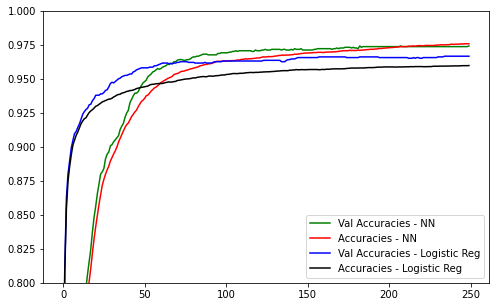

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

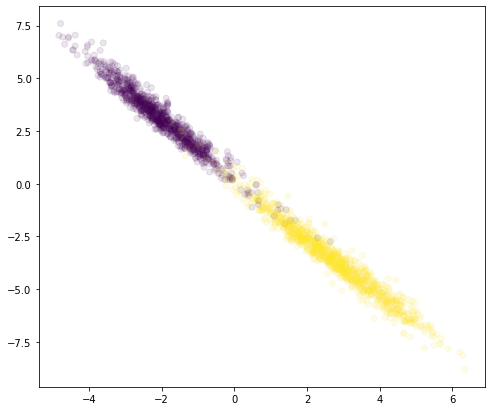

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

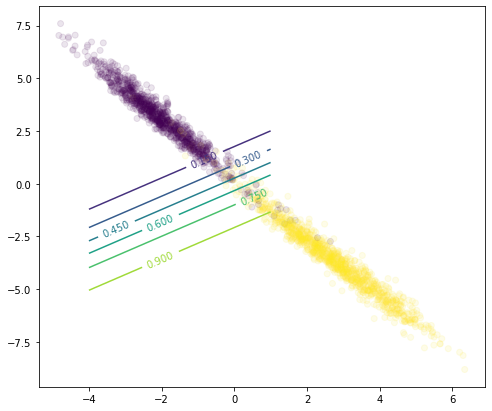

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );